International Airline Passengers dataset, totales mensuales en miles desde Enero 1949 a Diciembre 1960.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True) #que sea de tipo fecha el indice

In [3]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


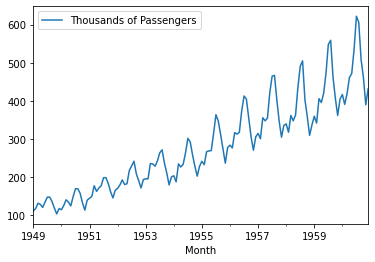

In [4]:
airline.plot();

# tendencia por encima de lineal - puede ser exponencial
# mejor separamos los componentes porque tambien hay estacionalidad clara

We can usually identify an additive or multiplicative time series from its variation. If the magnitude of the seasonal component changes with time, then the series is multiplicative. Otherwise, the series is additive

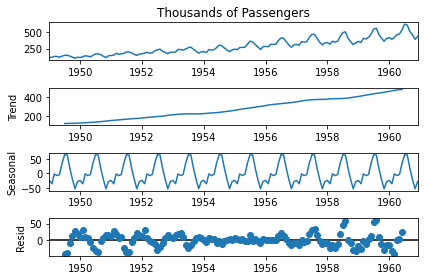

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='additive')  
result.plot();

# estacionalidad - se obtiene restando la tendencia a la serie original
# residual - lo que no se explica ni por la tendencia ni por la estacionalidad, cuaqluier errro que no lo explique lo anterior
# el efecto residual siempre parece ruido, pero nos sirve para indicar donde esta mas limpi y donde hay mas tuido
# por jemplo al principio y al final esta mas "sucio" los datos

# el modelo aditivo se usa cuando estemos seguros que la tendencia es lineal, sino es usa el multiplicativo
# por ejempo cada año se suman 100k pasajeros

<AxesSubplot:xlabel='Month'>

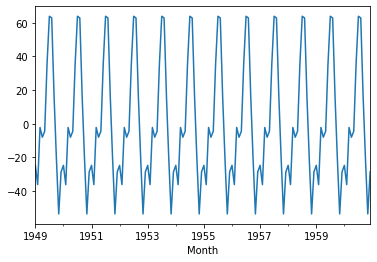

In [24]:
result.seasonal.plot()

<AxesSubplot:xlabel='Month'>

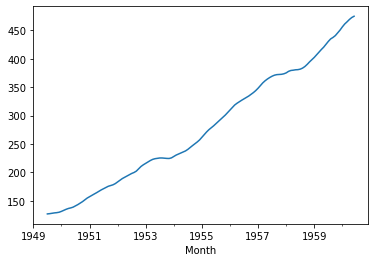

In [25]:
result.trend.plot()

<AxesSubplot:xlabel='Month'>

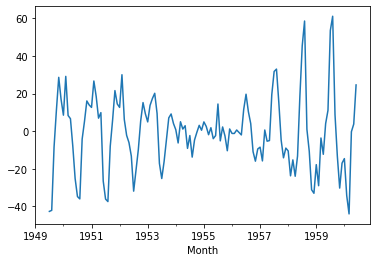

In [26]:
result.resid.plot()

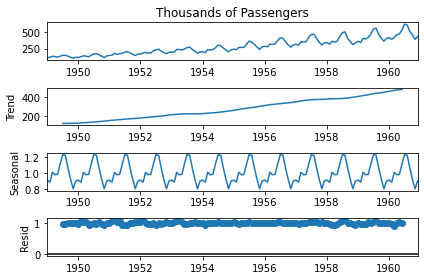

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')  
result.plot();

# el multiplicativo tiene mas sentido cuando la tasa es no lineal, por ejemplo se duplica los pasajeros cada año - exponencial

<AxesSubplot:xlabel='Month'>

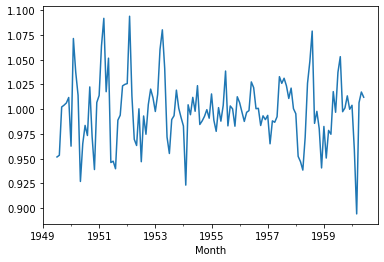

In [28]:
result.resid.plot()

In [29]:
import statsmodels.tsa.stattools as sts 
sts.adfuller(airline)

# obviamente no es estacionaria

(0.8153688792060428,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

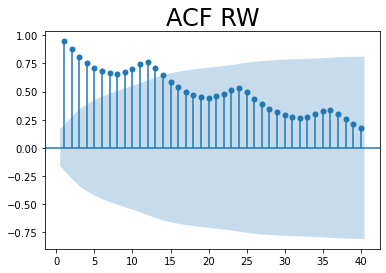

In [32]:
import statsmodels.graphics.tsaplots as sgt 
import matplotlib.pyplot as plt 
# cada punto es un mes la estacionaliadad son 12 puntos
# a partir de una año ya no es significativo


sgt.plot_acf(airline, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

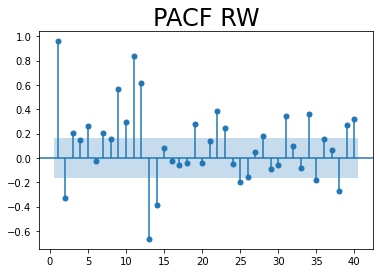

In [33]:
sgt.plot_pacf(airline, lags = 40, zero = False, method = 'ols')
plt.title("PACF RW", size = 24)
plt.show()